In [0]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar10

In [3]:
num_classes = 10
(trainX, trainY), (testX, testY) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
# preprocess images - normalization
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)

In [5]:
trainX[54, 12, 13, 1]

0.36862746

In [6]:
# NN architecture
input_layer = Input((32, 32, 3))
x = Flatten()(input_layer)
x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

W0904 13:12:02.515158 140119691319168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 13:12:02.562658 140119691319168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 13:12:02.584353 140119691319168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [7]:
# select optimizer and compile
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
             metrics=['accuracy'])

W0904 13:12:56.400919 140119691319168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 13:12:56.412474 140119691319168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
# train model
model.fit(trainX, trainY, batch_size=32, epochs=10, shuffle=True)

W0904 13:13:31.874212 140119691319168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 13:13:31.932818 140119691319168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
50000/50000 [==============================] - 14s 283us/step - loss: 1.8484 - acc: 0.3340
Epoch 2/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.6650 - acc: 0.4056
Epoch 3/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.5854 - acc: 0.4307
Epoch 4/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.5370 - acc: 0.4505
Epoch 5/10
50000/50000 [==============================] - 10s 191us/step - loss: 1.4964 - acc: 0.4686
Epoch 6/10
50000/50000 [==============================] - 9s 188us/step - loss: 1.4676 - acc: 0.4756
Epoch 7/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.4424 - acc: 0.4853
Epoch 8/10
50000/50000 [==============================] - 9s 187us/step - loss: 1.4207 - acc: 0.4938
Epoch 9/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.3960 - acc: 0.5038
Epoch 10/10
50000/50000 [==============================] - 10s 190us/step - loss: 1.3

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(testX)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(testY, axis =-1)]

In [10]:
print(preds_single, actual_single)

['cat' 'truck' 'ship' ... 'cat' 'deer' 'horse'] ['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']


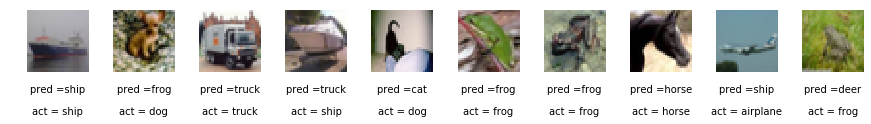

In [12]:
# analysis

n_to_show = 10
indices = np.random.choice(range(len(testX)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = testX[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred =' + str(preds_single[idx]), fontsize=10, 
         ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, 
           ha='center', transform=ax.transAxes)
  ax.imshow(img)